# Chapter 3
#### Setion 3.7. Concise Implementation of Softmax Regression

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
#import d2l
#d2l.__version__
#'0.17.0'
# Error in d2l train_epoch_ch3
import sys
sys.path.append('../d2l/')
from d2llocal import train_ch3


#### Initializing Model Parameters

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
'''
Each image sample in the dataset is a 28×28 , we will flatten each image, treating them as
vectors of length 784. So we treat each pixel location as just another feature.

Recall that in softmax regression, we have as many outputs as there are classes. 
So we have the output dimension of 10. Consequently, the weights will be a 784×10
matrix and the biases will constitute a 1×10 row vector. 
'''

# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

#Previous Initialization of W and b plus
#def net(X):
#    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

#### Cross-entropy Loss Function

In [4]:
# Loss function: cross_entropy(y_hat, y)
# Claro si el termino de mayor probabilidad es 1 la perdida es 0! (log(1) = 0)
loss = nn.CrossEntropyLoss(reduction='none')

#def cross_entropy(y_hat, y):
#    return - torch.log(y_hat[range(len(y_hat)), y])

#### Training

In [5]:
#updater or trainer w/ d2l.sgd([W, b], lr, batch_size)

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

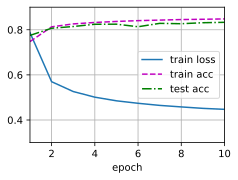

In [6]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

#### Prediction

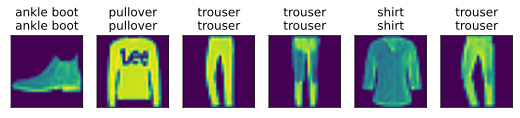

In [9]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)